## Data Analysis in Physics and Astronomy
## Exercise 5 - Tom Carron

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import t

a. Suppose we have two small sets of data, from Gaussian distributions of equal variance: (−1.22, −1.17, 0.93, −0.58,
A and (1.03, −1.59, −0.41, 0.71, 2.10) ∈ B. Compute the respective mean values and the pooled
standard deviation, s. 10 Points

The means of A and B are calculated to be:  mean of A= -0.6359999999999999 , mean of B= 0.368. The pooled standard deviation is calculated to be s= 1.0644153324713057.

In [26]:
A = np.array([-1.22, -1.17, 0.93, -0.58, -1.14])
B = np.array([1.03, -1.59, -0.41, 0.71, 2.10])
AB = np.concatenate((A, B))

In [27]:
# Pooled standard deviation of a and b, with standard deviations sa and sb
def pooledSD(a, b, sa, sb):
    n1 = len(a)
    n2 = len(b)
    top = (n1 - 1) * (sa**2) + (n2 - 1) * (sb**2)
    bottom = n1 + n2 - 2
    y = np.sqrt(top / bottom)
    return y

In [28]:
def T_val(X, Y, s, n, m):
    t = (X - Y) / (s * np.sqrt((1 / m) + (1 / n)))
    return t

In [29]:
A_mean = np.mean(A)
B_mean = np.mean(B)
sA = np.std(A)
sB = np.std(B)
# pooled standard deviation
s = pooledSD(A, B, sA, sB)
nu = len(A) + len(B) - 2
print("mean of A=", A_mean, ", mean of B=", B_mean)
print("pooled standard deviation s=", s)

mean of A= -0.6359999999999999 , mean of B= 0.368
pooled standard deviation s= 1.0644153324713057


b. Compute the t statistic. Perform a two tailed test. What is the chance that these data would
arise if the means were the same. What is the chance if we did a one-tailed test? 25 Points

The t statistic is calculated as: t =  -1.4913946999606198, corresponding to a p value of 0.08709874900265059 and a two tailed p value of 0.17419749800530118.

t value =  -1.4913946999606198
p value= 0.08709874900265059 two tailed p value= 0.17419749800530118


Text(0, 0.5, 'prob')

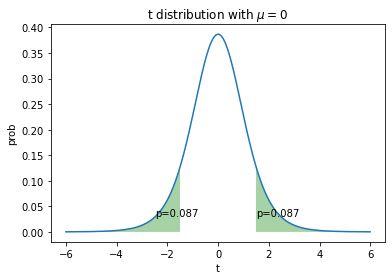

In [30]:
t_value = T_val(A_mean, B_mean, s, len(A), len(B))
print("t value = ", t_value)
p = t.cdf(t_value, nu)
print("p value=", p, "two tailed p value=", p * 2)
plt.fill_between(
    x=np.arange(-6, t_value, 0.01),
    y1=t.pdf(np.arange(-6, t_value, 0.01), nu),
    facecolor="g",
    alpha=0.35,
)
plt.plot(np.arange(-6, 6, 0.01), t.pdf(np.arange(-6, 6, 0.01), nu))
plt.fill_between(
    x=np.arange(-t_value, 6, 0.01),
    y1=t.pdf(np.arange(-t_value, 6, 0.01), nu),
    facecolor="g",
    alpha=0.35,
)
plt.text(x=-2.5, y=0.03, s="p=" + str(round(p, 3)))
plt.text(x=1.5, y=0.03, s="p=" + str(round(p, 3)))
plt.title(r"t distribution with $\mu =0$")
plt.xlabel("t")
plt.ylabel(r"prob")

c. Calculate the distribution of (µ x − µ y ) from a Bayesian point of view and plot the resulting
prob(µ x − µ y ) as a function of (µ x − µ y ). What is the chance that µ x is not smaller than µ y ? 25
Points

The probability mu_x not smaller than mu_y is  0.08709874900265058


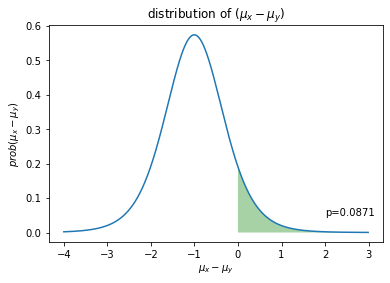

In [31]:
plt.plot(
    np.arange(-4, 3, 0.01),
    t.pdf(
        np.arange(-4, 3, 0.01),
        nu,
        loc=A_mean - B_mean,
        scale=s * np.sqrt(1 / len(A) + 1 / len(B)),
    ),
)
plt.fill_between(
    x=np.arange(0, 3, 0.01),
    y1=t.pdf(
        np.arange(0, 3, 0.01),
        nu,
        loc=A_mean - B_mean,
        scale=s * np.sqrt(1 / len(A) + 1 / len(B)),
    ),
    facecolor="g",
    alpha=0.35,
)
p2 = 1 - t.cdf(0, nu, loc=A_mean - B_mean, scale=s * np.sqrt(1 / len(A) + 1 / len(B)))
plt.title("distribution of $(\mu_x-\mu_y)$")
plt.xlabel("$\mu_x-\mu_y$")
plt.ylabel(r"$prob(\mu_x-\mu_y)$")
plt.text(x=2, y=0.05, s="p=" + str(round(p_red, 4)))
print("The probability mu_x not smaller than mu_y is ", p_red)

d. By analogous calculations we arrive at the F test for variances. Again Gaussian distributions
are assumed. The null hypothesis is σ x = σ y , the data are X i (i = 1, . . . , n) and Y i (i = 1, . . . , m)
and the test statistic is,
(
) 2
Σ i X i − X̄ /(n − 1)
F =
(
) 2
Σ i Y i − Ȳ /(m − 1)
This follows the F ratio distribution with (n − 1) and (m − 1) degrees of freedom. The testing is
the as for the Student’s t. Perform a test whether the variances of the two data sets are the same.
40 Points